# ObsID : 0945070132, SRCNUM : 1, Instru : EMOS1
**Simbad :** Gamma-ray Source (4FGL J0333.4-2705) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%4016018930&Name=4FGL%20J0333.4-2705&submit=submit

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [3]:
Spectrum(glob.glob("P*M1*SRSPEC*.FTZ")[0])


*** Error processing response data - file skipped

1 spectrum  in use
 
Spectral Data File: P0945070132M1S001SRSPEC0001.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.285e-02 +/- 1.330e-03 (91.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-17
  Telescope: XMM Instrument: EMOS1  Channel Type: PI
  Exposure Time: 1.425e+04 sec
 Using fit statistic: chi
 Using Background File                P0945070132M1S001BGSPEC0001.FTZ
  Background Exposure Time: 1.425e+04 sec
 No response loaded.

***Warning!  One or more spectra are missing responses,
               and are not suitable for fit.



***XSPEC Error: Response and spectrum have different number of

 channels (800 vs. 2400, respectively)


## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")


***XSPEC Error: No energies defined for spectrum 1, but plot requested on energy/wavelength axis.
 Plot Group 1 will not be constructed 



Exception: 

In [4]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

IndexError: list index out of range

### Black body model

In [6]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.025290e+11     using 17 bins.

Te

(-0.5, 856.5, 664.5, -0.5)

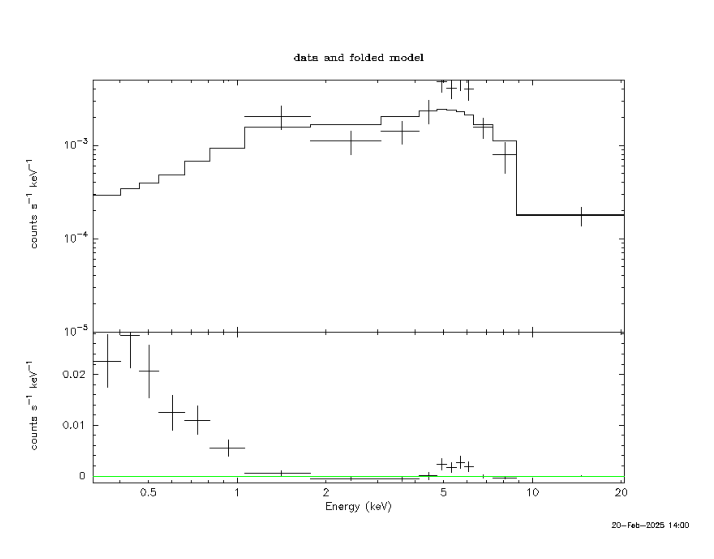

In [7]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [8]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.154490e+10     using 17 bins.

Test statistic : Chi-Squared              1.154490e+10     using 17 bins.
 Null hypothesis probability of 0.000000e+00 with 14 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
193.445      0.352059     -1     0.0283280       55.3774   2.87158e-05
185.279      305102       -1     0.0132901       199.119   4.53613e-05
171.206      198223       -1    0.00153982       199.358   5.63843e-05


(-0.5, 856.5, 661.5, -0.5)

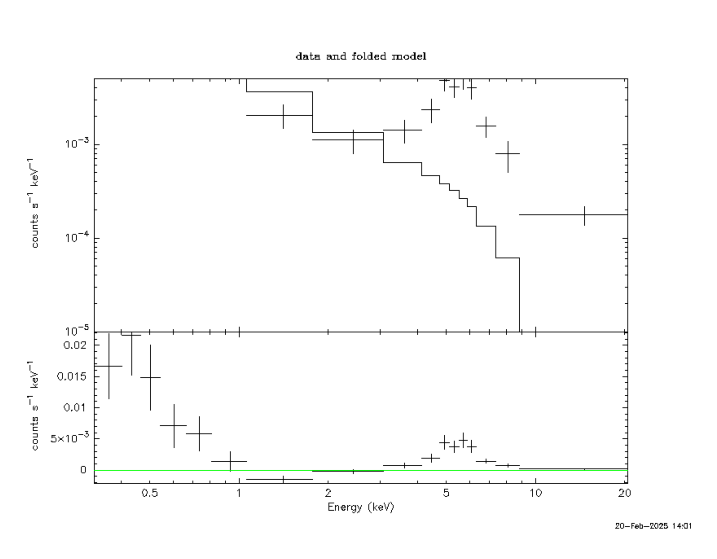

In [9]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [10]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              2.848353e+09     using 17 bins.

Test statistic : Chi-Squared              2.848353e+09     using 17 bins.
 Null hypothesis probability of 0.000000e+00 with 14 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
228.776      2.38516       0      0.989199      0.849153   

(-0.5, 860.5, 660.5, -0.5)

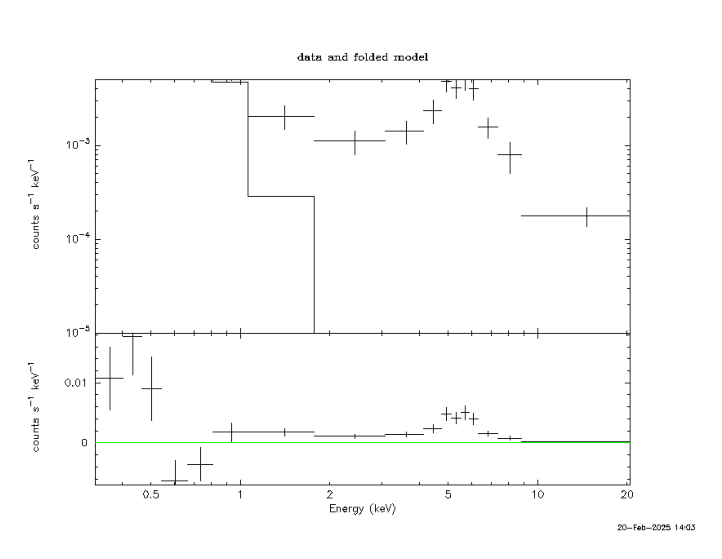

In [11]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [12]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.944905e+10     using 17 bins.

Test statistic : Chi-Squared              4.944905e+10     using 17 bins.
 Null hypothesis probability of 0.000000e+00 with 14 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
177.655      6.07543      -1      0.906356      0.196857   1.27879e-05
128.308      695408       -1      0.554346     -0.729915   6.72131e-06
121.741      248833       -1     0.0816526     -0.823523   5.29360e-0

(-0.5, 854.5, 659.5, -0.5)

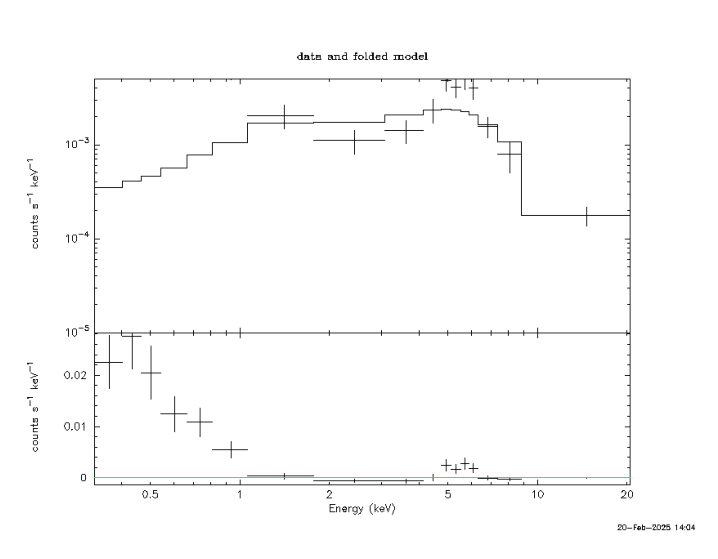

In [13]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Flux

In [14]:
AllModels.calcFlux(".2 12.0")

 Model Flux 0.00028209 photons (3.5473e-12 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [15]:
Flux = 3.5473e-12 # ergs/cm^2/s

### ESASky

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033331.9-270916
- IAU name : 4XMM J033331.9-270916
- RA : 03h 33m 31.917s
- DEC : -27° 09' 16.80"

``GAIA``

- Designation : Gaia DR3 5084568549147089792
- RA : 03h 33m 31.933s
- DEC : -27° 09' 16.53"
- Parallax : 0.1954 mas

``eROSITA``

- IAUNAME : 1eRASS J033331.8-270916
- RA : 03h 33m 31.807s
- DEC : -27° 09' 16.29"
- DEC : -28° 41' 55.05"

### Luminosity

In [6]:
"""GAIA"""

P_mas = 0.1954
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

NameError: name 'Flux' is not defined